# Working with Geospatial Data in Python

In [1]:
# Setup header
import contextily
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

restaurants_raw = pd.read_csv('paris_restaurants.csv')

## Introduction to Geospatial Vector Data

### Restaurants in Paris

First let's start off by getting a quick look at restaurants:

In [2]:
restaurants_raw.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


And now for a plot of (*x*, *y*) coordinates devoid of any broader context. I'm setting `markersize` to a low value because there's a lot of crowding:

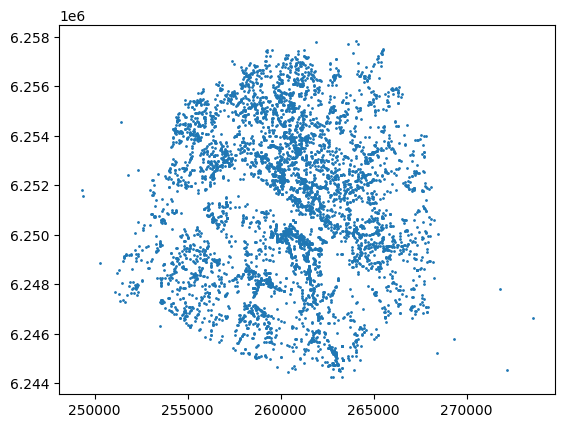

In [3]:
fig, ax = plt.subplots()
ax.plot(restaurants_raw['x'], restaurants_raw['y'], 'o', markersize=1)

### Adding a background map

contextily seems to be able to infer automatically which columns of the `DataFrame` supplied to matplotlib are needed to give a contextual background:

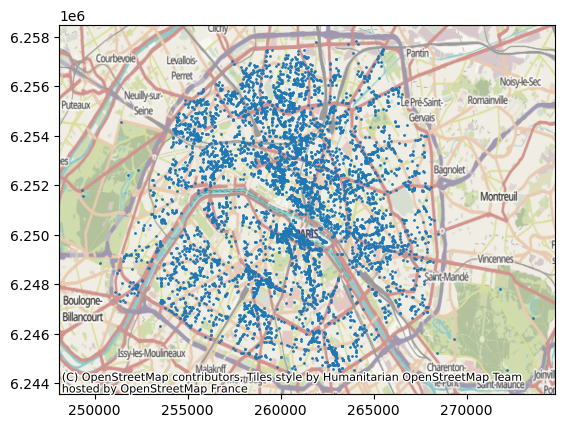

In [4]:
fig, ax = plt.subplots()
ax.plot(restaurants_raw['x'], restaurants_raw['y'], 'o', markersize=1)
contextily.add_basemap(ax)

### Explore the Paris districts (I)

Here is a very quick look at the structure of a `GeoDataFrame`. Don't clobber the `geometry` column!

In [5]:
districts = gpd.read_file('paris_districts_utm.geojson')
districts = districts.to_crs(epsg=3857) # Need this for compatibility with steps later down the line
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((260998.942 6250132.905, 260998.863 6250132.789, 260805.698 6250270..."
1,2,Halles,8984,"POLYGON ((261530.205 6251237.03, 261402.637 6250888.6, 261396.58 6250891.574..."
2,3,Palais-Royal,3195,"POLYGON ((260428.149 6251500.935, 260390.032 6251389.703, 260277.887 6251444..."
3,4,Place-Vendôme,3044,"POLYGON ((259590.927 6251970.939, 259525.101 6251814.88, 259069.074 6252037...."
4,5,Gaillon,1345,"POLYGON ((260077.976 6252488.522, 260027.754 6252323.563, 259783.548 6252411..."


A basic plot of a `GeoDataFrame` is incredibly easy to make:

<Axes: >

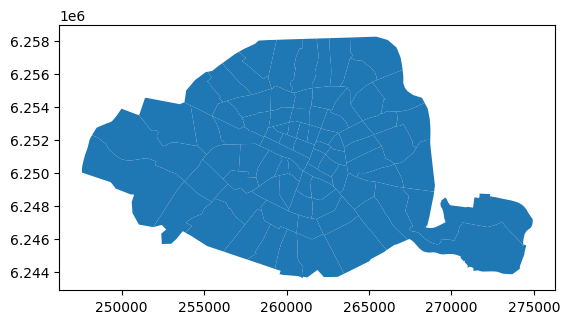

In [6]:
districts.plot()

### Explore the Paris districts (II)

Just some very basic introspection of `districts`:

In [7]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [8]:
type(districts['geometry'])

geopandas.geoseries.GeoSeries

In [9]:
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((260998.942 6250132.905, 260998.863 6250132.789, 260805.698 6250270..."
1,2,Halles,8984,"POLYGON ((261530.205 6251237.03, 261402.637 6250888.6, 261396.58 6250891.574..."
2,3,Palais-Royal,3195,"POLYGON ((260428.149 6251500.935, 260390.032 6251389.703, 260277.887 6251444..."
3,4,Place-Vendôme,3044,"POLYGON ((259590.927 6251970.939, 259525.101 6251814.88, 259069.074 6252037...."
4,5,Gaillon,1345,"POLYGON ((260077.976 6252488.522, 260027.754 6252323.563, 259783.548 6252411..."


In [10]:
districts.area

0     2.006382e+06
1     9.523592e+05
2     6.320187e+05
3     6.222848e+05
4     4.342336e+05
          ...     
75    2.991977e+06
76    1.863014e+06
77    3.434542e+06
78    3.692271e+06
79    4.826473e+06
Length: 80, dtype: float64

You may be wondering, what are the units of `.area`? `.area` uses the CRS of the `GeoDataFrame`, meaning that the units are meters squared in this instance:

In [11]:
districts.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### The Paris restaurants as a `GeoDataFrame`

Here `restaurants_raw` is converted using its `x` and `y` columns to a proper `GeoDataFrame`:

In [12]:
restaurants = gpd.GeoDataFrame(restaurants_raw, geometry=gpd.points_from_xy(restaurants_raw['x'], restaurants_raw['y']))
restaurants = restaurants.drop(['x', 'y'], axis=1)
restaurants.head()

,type,geometry
0,European restuarant,POINT (259641.692 6251867.063)
1,Traditional French restaurant,POINT (259572.34 6252029.683)
2,Traditional French restaurant,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,POINT (259684.438 6252203.137)
4,Traditional French restaurant,POINT (259597.943 6252230.044)


Brief interlude: I just wanted to know how to do this operation with any type of `DataFrame`:

In [13]:
restaurants['type'].value_counts()

type
Traditional French restaurant            1945
Asian restaurant                         1642
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
African restaurant                        138
Other world restaurant                    107
Central and South American restuarant      97
Caribbean restaurant                       27
Name: count, dtype: int64

Plotting with contextual tiles is very easy:

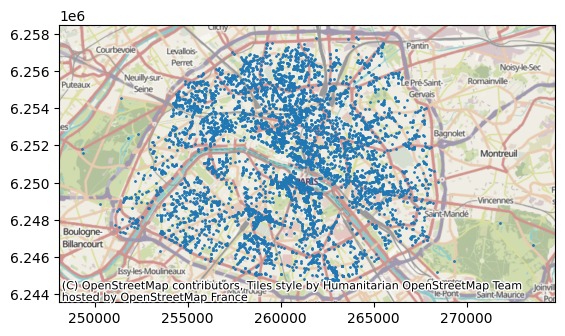

In [14]:
ax = restaurants.plot(markersize=1)
contextily.add_basemap(ax)

### Visualizing the population density

Here a population density column is added and plotted. Note that multiplication by `10**6` is necessary to convert the density to population per squared kilometer:

<Axes: >

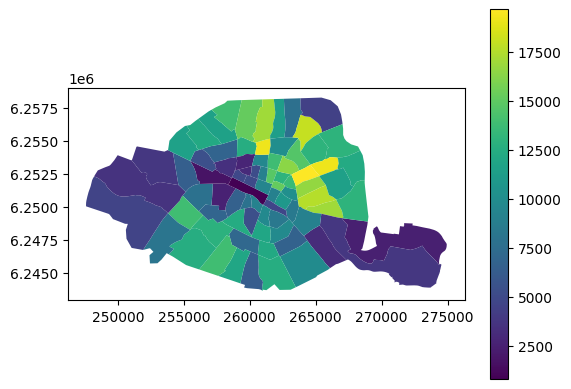

In [15]:
districts['population_density'] = districts['population'] / districts.area * 10**6
districts.plot('population_density', legend=True)

In [16]:
restaurants

,type,geometry
0,European restuarant,POINT (259641.692 6251867.063)
1,Traditional French restaurant,POINT (259572.34 6252029.683)
2,Traditional French restaurant,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,POINT (259684.438 6252203.137)
4,Traditional French restaurant,POINT (259597.943 6252230.044)
...,...,...
5730,Asian restaurant,POINT (259415.268 6253553.831)
5731,European restuarant,POINT (259039.342 6253966.817)
5732,Asian restaurant,POINT (267737.068 6251037.256)
5733,Maghrebian restaurant,POINT (267811.874 6250976.682)


### Using pandas functionality: `groupby()`

`GeoDataFrame` inherits from `DataFrame` and has all of the same functionality as `DataFrame`. Here's a crappier version of what I did earlier:

In [17]:
type_counts = restaurants.groupby('type').size()
type_counts

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64

### Plotting multiple layers

Here's an improved version of what the exercise made me do:

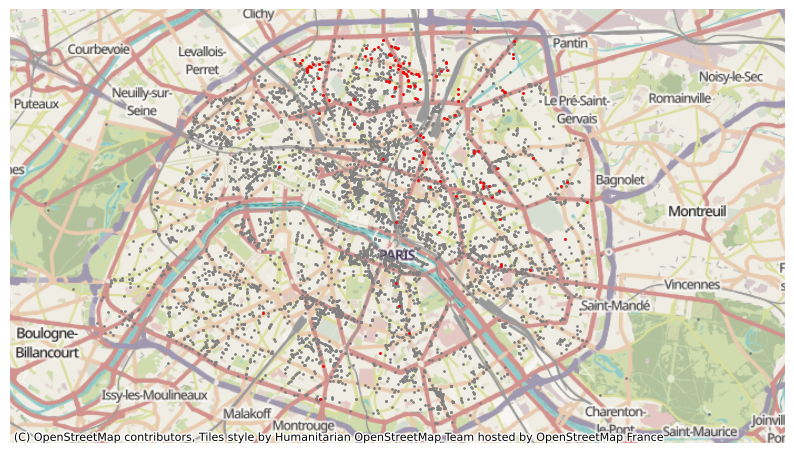

In [18]:
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']

fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='gray', markersize=1)
african_restaurants.plot(ax=ax, color='red', markersize=1)
contextily.add_basemap(ax)
ax.set_axis_off()

## Shapely geometries and spatial relationships

### Creating a `Point` geometry

N.b.: I'm not sure how to convert figures like these into latitude and longtitude:

In [19]:
eiffel_tower = Point(255422.6, 6250868.9)
print(eiffel_tower) # Jupyter Notebook attempts to plot this otherwise

POINT (255422.6 6250868.9)


### shapely's spatial methods

Extracting the Montparnasse and "resto" (French slang for "restaurant") geometries

In [20]:
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

Interlude: figured out how to get longitude and latitude out of `GeoDataFrame`s presented here:

In [21]:
# Where is this "resto"? The coordinates are in easting and northing in meters
restaurants.loc[956]

type                      Traditional French restaurant
geometry    POINT (258904.2000192164 6248127.313325831)
Name: 956, dtype: object

In [22]:
# Set CRS first because I loaded from a .csv rather than a dedicated geospatial file format
restaurants = restaurants.set_crs(epsg=3857)
# Reproject to EPSG:4326 and get the longitude and latitude in that order
restaurants.to_crs(epsg=4326).loc[956]

type                        Traditional French restaurant
geometry    POINT (2.3257759999999976 48.842193999999985)
Name: 956, dtype: object

Reversing the two figures gives a coordinate pair that can be entered into Google Maps. There is not just one restaurant in the area, but several (including a Burger King):

![](restaurants_in_google_maps.png)

### In which district in the Eiffel Tower located?

The lesson draw this out but it can be condensed to one line:

In [23]:
districts[districts.contains(eiffel_tower)]

,id,district_name,population,geometry,population_density
27,28,Gros-Caillou,25156,"POLYGON ((257097.29 6250116.967, 256754.256 6250146.243, 256647.209 6250179....",7885.196063


### How far is the closest restaurant?

The intended output of this exercise is crude but I'm going to let it slide for now in case Folium etc. make things easier:

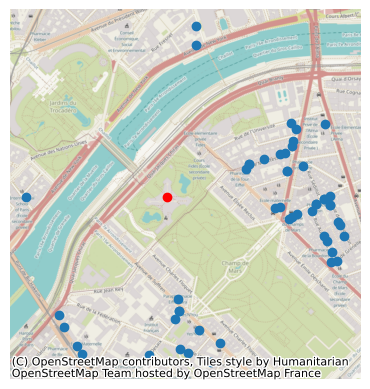

In [24]:
restaurants_near_eiffel = restaurants[restaurants.distance(eiffel_tower) < 1000]

ax = restaurants_near_eiffel.plot()
gpd.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()

### Paris: spatial join of districts and bike stations

First, load the `stations` dataset and reproject to EPSG:3857:

In [25]:
stations = gpd.read_file('paris_sharing_bike_stations_utm.geojson')
stations = stations.to_crs(epsg=3857)
stations

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)
...,...,...,...,...
1221,12011 - CHARENTON,36,35,POINT (265227.474 6248579.501)
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (262307.142 6244549.88)
1223,07006 - QUAI VOLTAIRE,32,25,POINT (259532.287 6250960.774)
1224,21311 - GAMBETTA (ISSY LES MOULINEAUX),55,47,POINT (253646.981 6245637.291)


Interlude: I want to visualize a left join (the lesson uses the default inner join):

In [26]:
joined = gpd.sjoin(stations, districts, predicate='within', how='left')
joined

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population,population_density
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771),52.0,53.0,Montparnasse,18570.0,7147.982945
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894),79.0,80.0,Charonne,62901.0,13032.499031
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469),79.0,80.0,Charonne,62901.0,13032.499031
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824),NaN,NaN,NaN,NaN,NaN
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1221,12011 - CHARENTON,36,35,POINT (265227.474 6248579.501),47.0,48.0,Quinze-Vingts,25752.0,9029.350211
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (262307.142 6244549.88),50.0,51.0,Maison-Blanche,64797.0,12594.669592
1223,07006 - QUAI VOLTAIRE,32,25,POINT (259532.287 6250960.774),24.0,25.0,Saint-Thomas-d'Aquin,12661.0,6635.748788
1224,21311 - GAMBETTA (ISSY LES MOULINEAUX),55,47,POINT (253646.981 6245637.291),NaN,NaN,NaN,NaN,NaN


Here are the bike stands on the left not joined with a district on the right:

In [27]:
not_joined = joined[joined['index_right'].isna()]
not_joined

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population,population_density
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824),NaN,NaN,NaN,NaN,NaN
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705),NaN,NaN,NaN,NaN,NaN
5,21113 - PETIT (CLICHY),25,2,POINT (255659.291 6257800.14),NaN,NaN,NaN,NaN,NaN
6,35006 - DELIZY (PANTIN),22,1,POINT (268178.411 6257289.363),NaN,NaN,NaN,NaN,NaN
8,21707 - PASTEUR (VANVES),24,0,POINT (255199.97 6245236.349),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1191,33003 - FAURE (AUBERVILLIERS),45,0,POINT (265288.316 6258581.781),NaN,NaN,NaN,NaN,NaN
1192,21701 - LARMEROUX (VANVES),28,20,POINT (253918.587 6243856.817),NaN,NaN,NaN,NaN,NaN
1194,31707 - VAILLANT (BAGNOLET),49,3,POINT (268821.055 6250868.17),NaN,NaN,NaN,NaN,NaN
1217,41605 - GENERAL DE GAULLE 2 (SAINT MANDE),22,2,POINT (269271.562 6247094.699),NaN,NaN,NaN,NaN,NaN


Lastly, let's plot these unmatched bike stations and the districts of Paris. As I expected, the bike stations are all in the suburbs of Paris:

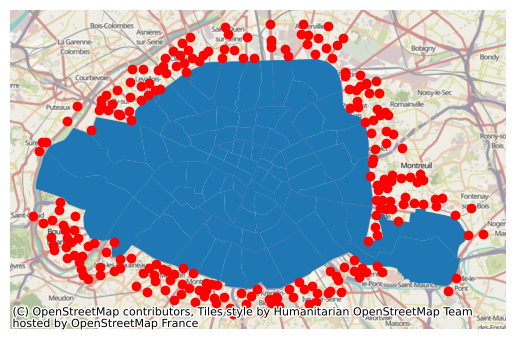

In [28]:
ax = districts.plot()
not_joined.plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()

Now back to scheduled programming:

In [29]:
joined = gpd.sjoin(stations, districts, predicate='within')
joined

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population,population_density
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771),52,53,Montparnasse,18570,7147.982945
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894),79,80,Charonne,62901,13032.499031
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469),79,80,Charonne,62901,13032.499031
7,01007 - ETIENNE MARCEL,16,14,POINT (261344.994 6251743.204),1,2,Halles,8984,9433.415180
9,20019 - MAQUIS DU VERCORS - PORTE DES LILAS,30,1,POINT (268121.12 6254073.452),77,78,Saint-Fargeau,42087,12254.036802
...,...,...,...,...,...,...,...,...,...
1220,05110 - LACEPEDE,23,5,POINT (261812.558 6248409.171),17,18,Jardin-des-Plantes,18005,9774.527848
1221,12011 - CHARENTON,36,35,POINT (265227.474 6248579.501),47,48,Quinze-Vingts,25752,9029.350211
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (262307.142 6244549.88),50,51,Maison-Blanche,64797,12594.669592
1223,07006 - QUAI VOLTAIRE,32,25,POINT (259532.287 6250960.774),24,25,Saint-Thomas-d'Aquin,12661,6635.748788


### Map of tree density by district (1)

In [30]:
trees = gpd.read_file('paris_trees_small.gpkg')
trees = trees.to_crs(epsg=3857)
trees

,species,location_type,geometry
0,Marronnier,Alignement,POINT (266943.038 6249180.953)
1,Marronnier,Alignement,POINT (252825.076 6251787.771)
2,Marronnier,Alignement,POINT (257751.975 6247727.367)
3,Marronnier,Alignement,POINT (260810.948 6246865.138)
4,Sophora,Alignement,POINT (253617.023 6247506.702)
...,...,...,...
7851,Erable,Jardin,POINT (257665.901 6246930.882)
7852,Orme,Alignement,POINT (262638.364 6244421.133)
7853,Platane,Alignement,POINT (266401.415 6250692.004)
7854,Tilleul,PERIPHERIQUE,POINT (268702.807 6250607.231)
